# Analisis Exploratorio de Datos

Prueba Bi Lead
Eduardo Gonzalez Fierro

## Contexto

Eres el líder BI en la empresa ABC, una compañía de GAMBLING en COLOMBIA. Eres responsable de analizar datos para optimizar estrategias comerciales y operativas y los recursos relacionados con datos. Recuerda hacer propuestas de valor para el negocio basadas en los datos.

### Importar librerias

In [1]:
# Import las librerias necesarias para el análisis de datos
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

### Limpieza de los datos

In [2]:
# Carga de datos

# leer todo el contenido del Excel como texto
raw = pd.read_excel('assetment-bookmaker.xlsx', engine='openpyxl', header=None, dtype=str)

# si el Excel tiene una sola columna con cada fila = línea CSV
if raw.shape[1] == 1:
    csv_text = raw.iloc[:, 0].str.cat(sep='\n')
    df = pd.read_csv(StringIO(csv_text))
else:
    # si las líneas CSV están repartidas en varias celdas por fila, unir por coma
    csv_text = raw.astype(str).apply(lambda r: ','.join(r.dropna()), axis=1).str.cat(sep='\n')
    df = pd.read_csv(StringIO(csv_text))

df

,Periodo,# Clicks,# Registros IN,# Primer depÃ³sito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
0,2022-08-04,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-03,NaN,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,NaN,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
442,2023-09-22,NaN,0.0,0.0,20.337191,1.0,60.688212,16.547864
443,2023-09-23,NaN,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
444,2023-09-23,NaN,0.0,0.0,0.000000,1.0,17.277301,6.835713
445,2023-09-24,NaN,2.0,8.0,9435.159241,891.0,62595.900804,1938.007500


In [3]:
# Renombrar columnas con caracteres especiales
df = df.rename(columns={'# Primer depÃ³sito IN':'# Primer depósito IN'})
df

,Periodo,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
0,2022-08-04,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-03,NaN,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,NaN,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
442,2023-09-22,NaN,0.0,0.0,20.337191,1.0,60.688212,16.547864
443,2023-09-23,NaN,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
444,2023-09-23,NaN,0.0,0.0,0.000000,1.0,17.277301,6.835713
445,2023-09-24,NaN,2.0,8.0,9435.159241,891.0,62595.900804,1938.007500


In [4]:
# Información del DataFrame, incluyendo tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Periodo                      447 non-null    object 
 1   # Clicks                     269 non-null    float64
 2   # Registros IN               424 non-null    float64
 3   # Primer depósito IN         424 non-null    float64
 4   Total depositado IN          404 non-null    float64
 5   # Personas que apostaron IN  404 non-null    float64
 6   Total apostado               404 non-null    float64
 7   Net revenue IN               404 non-null    float64
dtypes: float64(7), object(1)
memory usage: 28.1+ KB


In [5]:
# Estadísticas descriptivas del DataFrame
df.describe()

,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
count,269.000000,424.000000,424.000000,404.000000,404.000000,404.000000,404.000000
mean,1332.037175,24.716981,13.926887,4264.528107,277.868812,33410.939323,924.937067
std,2180.594419,100.916955,48.932934,4259.580876,324.975136,41727.585071,3384.336651
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.206802,-19141.062751
25%,3.000000,0.000000,0.000000,881.910946,114.750000,4434.178872,-4.609303
50%,283.000000,0.000000,1.000000,2736.441715,178.000000,16856.000015,159.635620
75%,2222.000000,4.000000,5.000000,7317.723531,220.500000,47524.790752,1765.929862
max,18707.000000,1324.000000,659.000000,23800.789951,1427.000000,289945.271312,25210.346664


In [6]:
# Manejo de valores nulos
df['# Clicks'].fillna(df['# Clicks'].mean(), inplace=True)
df['# Registros IN'].fillna(df['# Registros IN'].mean(), inplace=True)
df['# Primer depósito IN'].fillna(df['# Primer depósito IN'].mean(), inplace=True)
df['Total depositado IN'].fillna(df['Total depositado IN'].mean(), inplace=True)
df['# Personas que apostaron IN'].fillna(df['# Personas que apostaron IN'].mean(), inplace=True)
df['Total apostado'].fillna(df['Total apostado'].mean(), inplace=True)
df['Net revenue IN'].fillna(df['Net revenue IN'].mean(), inplace=True)

df.describe()

,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,1332.037175,24.716981,13.926887,4264.528107,277.868812,33410.939323,924.937067
std,1690.343095,98.280395,47.654510,4049.039022,308.912319,39665.080949,3217.056223
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.206802,-19141.062751
25%,7.000000,0.000000,0.000000,1265.688220,135.000000,8240.022925,-2.110557
50%,1332.037175,0.000000,1.000000,3324.817017,184.000000,20584.603338,421.270747
75%,1332.037175,5.500000,7.500000,6467.392406,277.868812,45237.639850,1523.348032
max,18707.000000,1324.000000,659.000000,23800.789951,1427.000000,289945.271312,25210.346664


En este punto podemos presenciar que, en la mayoría de columnas del dataframe, existen valores faltantes. Es necesario reemplazar esos valores faltantes o eliminarlos. Para este caso, dado que se trata de un dataframe pequeño, eliminar los valores faltantes podría afectar la proyección requerida para el ejercicio. Por lo tanto, se procede a reemplazar los valores faltantes con el promedio.

In [7]:
# Eliminación de filas duplicadas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (447, 8)
Tamaño del set después de eliminar las filas repetidas: (446, 8)


In [8]:
# Conversión de tipos de datos
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y-%m-%d').dt.date
df['# Clicks'] = df['# Clicks'].astype(int)
df['# Registros IN'] = df['# Registros IN'].astype(int)
df['# Primer depósito IN'] = df['# Primer depósito IN'].astype(int)
df['Total depositado IN'] = pd.to_numeric(df['Total depositado IN'], errors='coerce').round(2)
df['# Personas que apostaron IN'] = df['# Personas que apostaron IN'].astype(int)
df['Total apostado'] = pd.to_numeric(df['Total apostado'], errors='coerce').round(2)
df['Net revenue IN'] = pd.to_numeric(df['Net revenue IN'], errors='coerce').round(2)

df.dtypes

Periodo                         object
# Clicks                         int32
# Registros IN                   int32
# Primer depósito IN             int32
Total depositado IN            float64
# Personas que apostaron IN      int32
Total apostado                 float64
Net revenue IN                 float64
dtype: object

In [9]:
# Vista previa del DataFrame limpio
df.head()

,Periodo,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
0,2022-08-04,3,24,13,4264.53,277,33410.94,924.94
1,2022-08-08,1,24,13,4264.53,277,33410.94,924.94
2,2022-08-09,1,24,13,4264.53,277,33410.94,924.94
3,2022-11-03,1332,0,0,194.52,1,194.52,160.48
4,2022-11-04,1332,0,0,0.00,1,44.17,6.68


In [10]:
# Información final del DataFrame limpio
df.to_excel('eda_empresa_abc_limpio.xlsx', index=False)

### Analisis de variables

In [11]:
# Información final del DataFrame limpio
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Periodo                      446 non-null    object 
 1   # Clicks                     446 non-null    int32  
 2   # Registros IN               446 non-null    int32  
 3   # Primer depósito IN         446 non-null    int32  
 4   Total depositado IN          446 non-null    float64
 5   # Personas que apostaron IN  446 non-null    int32  
 6   Total apostado               446 non-null    float64
 7   Net revenue IN               446 non-null    float64
dtypes: float64(3), int32(4), object(1)
memory usage: 24.4+ KB


In [12]:
# Estadísticas descriptivas del DataFrame limpio
df.describe()

,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,1335.006726,24.735426,13.910314,4264.528363,277.786996,33410.939439,924.937511
std,1691.061942,98.383916,47.703919,4053.586133,309.259321,39709.623362,3220.668954
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.210000,-19141.060000
25%,7.000000,0.000000,0.000000,1263.385000,134.500000,8233.030000,-2.120000
50%,1332.000000,0.000000,1.000000,3310.390000,183.500000,20182.915000,415.445000
75%,1332.000000,5.750000,7.750000,6487.995000,277.000000,45416.285000,1533.342500
max,18707.000000,1324.000000,659.000000,23800.790000,1427.000000,289945.270000,25210.350000


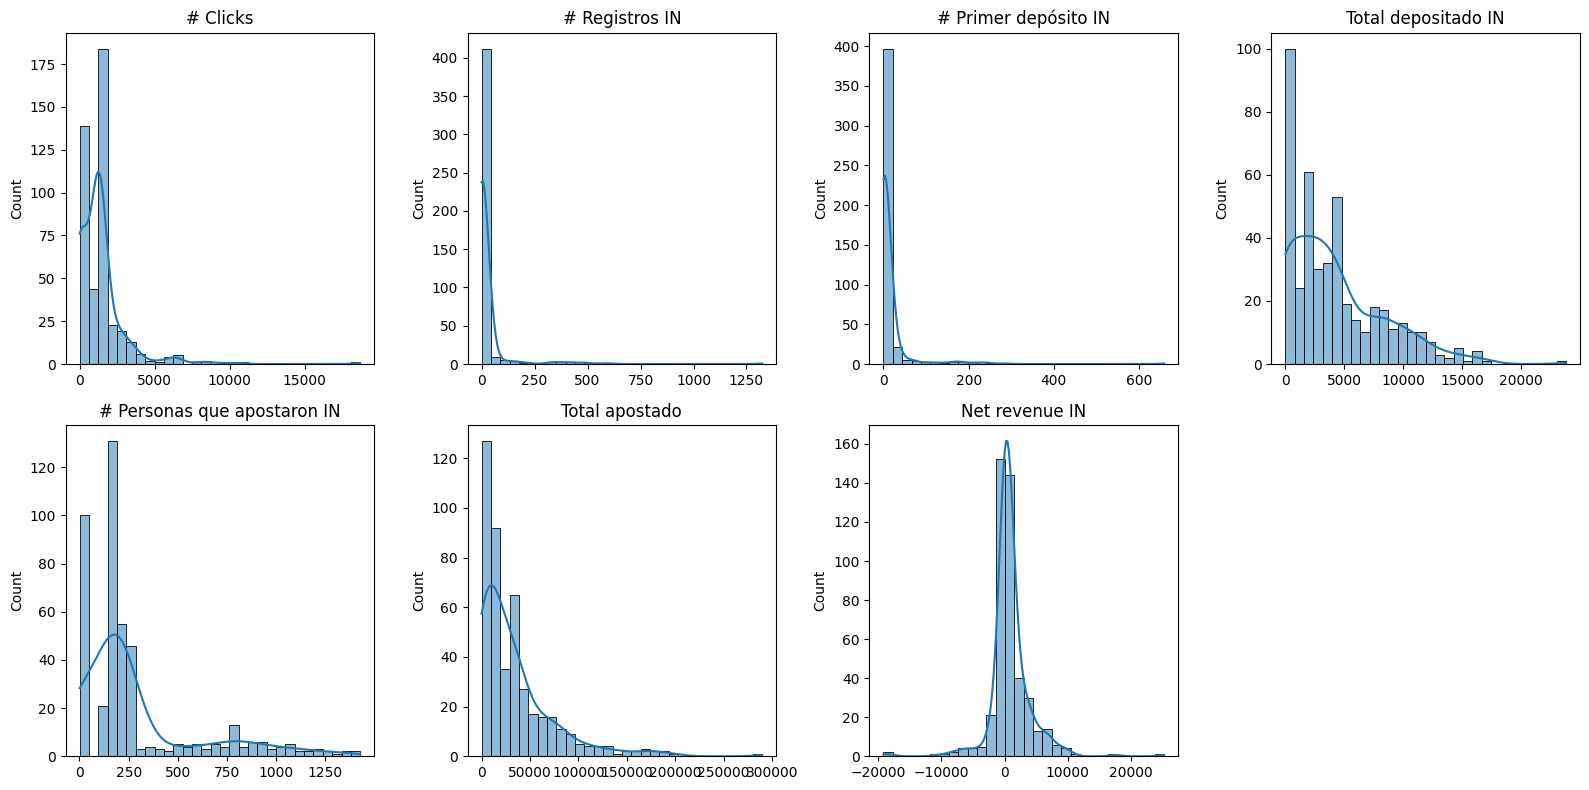

In [ ]:
# Dibujar histogramas
col_num = ['# Clicks', '# Registros IN', '# Primer depósito IN', 'Total depositado IN', '# Personas que apostaron IN', 'Total apostado', 'Net revenue IN']

# Asegurar tipo numérico
for c in col_num:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Configuración de la figura
cols = 4
rows = int(np.ceil(len(col_num) / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(col_num):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30, color='C0')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].ticklabel_format(axis='x', useOffset=False)

# Ocultar ejes sobrantes
for j in range(len(col_num), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Observaciones:**

- La mayor parte de los clics registrados se encuentra entre 0 y 2.500 clics.
- La mayor parte de los registros IN se encuentra entre 0 y 10 unidades monetarias.
- La mayor parte del primer depósito IN registrado se encuentra entre 0 y 50 unidades monetarias.
- La mayor parte del total depositado registrado se encuentra entre 0 y 12.500 unidades monetarias.
- La mayor parte de las personas que apostaron IN registradas se encuentra entre 0 y 250 personas.
- La mayor parte del total apostado registrado se encuentra entre 0 y 50.000 unidades monetarias.
- La mayor parte del net revenue IN registrado se encuentra entre 0 y 5.000 unidades monetarias.

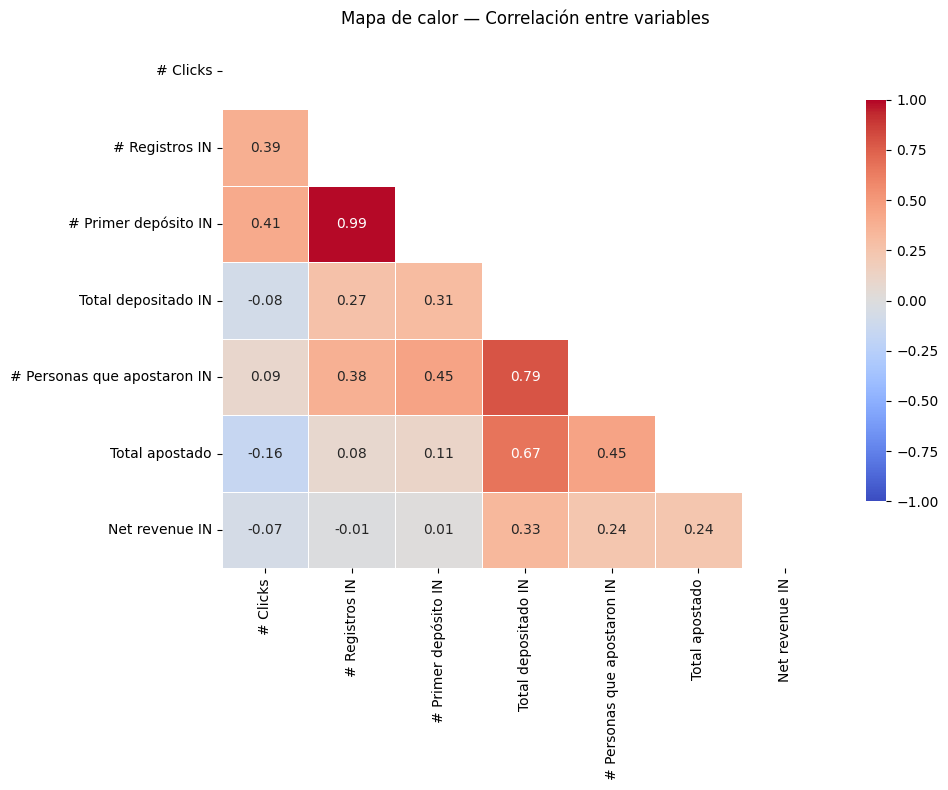

In [14]:
# Mapa de calor de correlación entre variables numéricas
col_num = ['# Clicks', '# Registros IN', '# Primer depósito IN', 'Total depositado IN', '# Personas que apostaron IN', 'Total apostado', 'Net revenue IN']

# Asegurar tipo numérico
for c in col_num:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Calcular correlación
num_df = df[col_num]
corr = num_df.corr(method='pearson').round(2)

# Dibujar heatmap (ocultar triángulo superior)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Mapa de calor — Correlación entre variables')
plt.tight_layout()
plt.show()

**Obervaciones:**

- El mayor nivel de correlación se observa entre las variables # Primer depósito IN y # Registros IN. Esto se debe a que, para un usuario que realiza su primera apuesta, el valor del primer depósito tiende a coincidir con el total registrado como IN en esa primera transacción.
- El segundo par con mayor correlación corresponde a # Personas que apostaron IN y Total depositado IN. Esta relación es esperada, ya que un incremento en el número de usuarios activos que realizan apuestas suele traducirse en un mayor monto total depositado en la plataforma.
- En tercer lugar, se identificó una correlación elevada entre Total apostado y Total depositado IN. Dado que las apuestas se procesan de manera electrónica, es razonable que el total apostado refleje en gran medida los valores previamente depositados por los usuarios.
- Por último, la variable Net revenue IN, que corresponde a la métrica objetivo del modelo, presenta una correlación baja con el resto de variables evaluadas. Debido a esta baja relación, se concluye que no existe una dependencia lineal fuerte con los demás indicadores, por lo que se da por finalizado el análisis correlacional.

### Proyeccion de ingresos netos

Para la proyeccion de los proximos 24 meses de los ingresos netos se opto por utilizar el modelo de series de tiempo Prophet, teniendo en cuenta lo siguiente:

- Diseñado para series temporales con tendencia y estacionalidad (diaria/semanal/anual) — facilita modelar efectos anuales sin mucha ingeniería.
- Detecta automáticamente puntos de cambio (changepoints) en la tendencia, útil cuando la serie tiene rupturas.
- Maneja datos con valores faltantes y outliers de forma robusta, sin necesidad de imputaciones complejas.
- Genera intervalos de incertidumbre (forecast intervals) de forma nativa, útiles para la toma de decisiones.
- Fácil de usar y de interpretar (componentes trend / seasonality / holidays), rápido para prototipar pronósticos.

In [ ]:
# Importar Prophet para modelado de series temporales
from prophet import Prophet

C:\Users\edugo\AppData\Local\Temp\ipykernel_2596\4227717748.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df.set_index('Periodo')['Net revenue IN'].resample('M').sum().interpolate().fillna(method='bfill')
20:41:32 - cmdstanpy - INFO - Chain [1] start processing
20:41:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\edugo\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\edugo\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will r

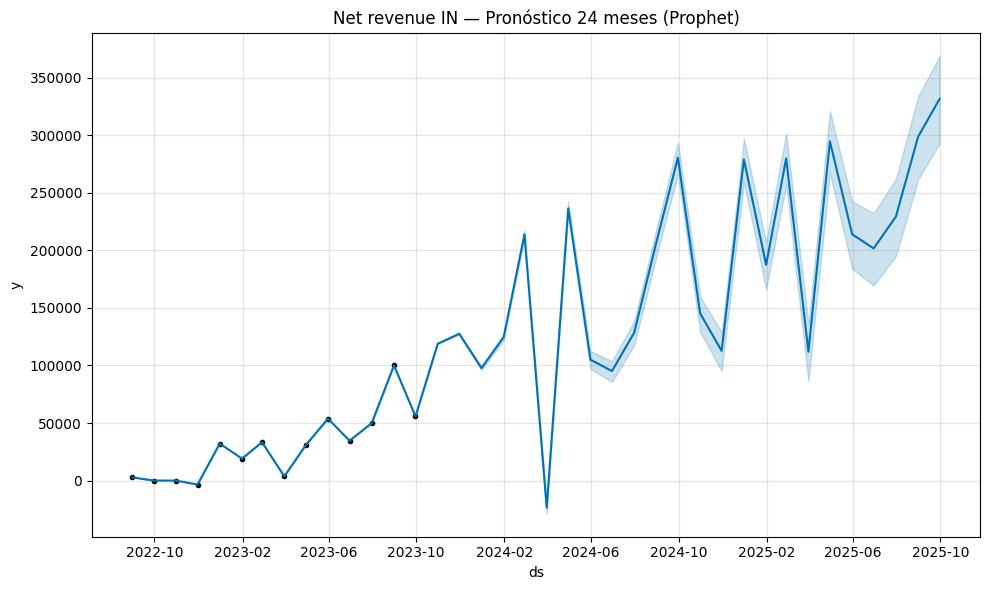

In [ ]:
# Preparar serie mensual
df['Periodo'] = pd.to_datetime(df['Periodo'])
df['Net revenue IN'] = pd.to_numeric(df['Net revenue IN'], errors='coerce')
series = df.set_index('Periodo')['Net revenue IN'].resample('M').sum().interpolate().fillna(method='bfill')

# DataFrame
prophet_df = series.reset_index().rename(columns={'Periodo': 'ds', 'Net revenue IN': 'y'})

# Ajustar modelo
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(prophet_df)

# Generar futuro y predecir
future = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(future)

# Serie de pronóstico
forecast_series = forecast.set_index('ds')['yhat'].rename('Net revenue IN_forecast')
forecast_df = forecast_series.reset_index().rename(columns={'ds': 'Periodo'})
forecast_df['Periodo'] = pd.to_datetime(forecast_df['Periodo'])

# Visualizar
fig = m.plot(forecast)
plt.title('Net revenue IN — Pronóstico 24 meses (Prophet)')
plt.tight_layout()
plt.show()

In [ ]:
# Exportar pronóstico a Excel
forecast_df.to_excel('forecast_eda_empresa_abc.xlsx', index=False)